# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
#!pip install citipy
#!pip install openweathermapy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy as owm

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
settings = {"units": "imperial", "appid": weather_api_key}

# Initialize data frame to store data from API calls


cityname = []
cloudiness = []
country = []
date = []
max_temp = []
wind_speed = []
lat = []
lng = []
humidity = []



count = 1
err = 0
sets = 0
index = 0
t0 =time.time()
print(f"Beginning Data Retrieval")
for city in cities:
    try:
        city1 = city.replace(" ", "%20")
        print(f'Processing Record {count} of Set {sets} | {city}' )
        #print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={weather_api_key}')
        city_info = owm.get_current(city, **settings)
        cityname.append(city_info["name"])
        cloudiness.append(city_info("clouds.all"))
        country.append(city_info("sys.country"))
        date.append(city_info("dt"))
        max_temp.append(city_info("main.temp_max"))
        wind_speed.append(city_info("wind.speed"))
        lat.append(city_info("coord.lat"))
        lng.append(city_info("coord.lon"))
        humidity.append(city_info("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: 
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()
print("End of Data Retrieval")
print(f"Error found for {err} cities")



Beginning Data Retrieval
Processing Record 1 of Set 0 | kapaa
Processing Record 2 of Set 0 | bathsheba
Processing Record 3 of Set 0 | ushuaia
Processing Record 4 of Set 0 | talnakh
Processing Record 5 of Set 0 | vila franca do campo
Processing Record 6 of Set 0 | turayf
Processing Record 7 of Set 0 | attawapiskat
HTTP Error 404: Not Found
Processing Record 8 of Set 0 | sri aman
Processing Record 9 of Set 0 | punta arenas
Processing Record 10 of Set 0 | provideniya
Processing Record 11 of Set 0 | puerto ayora
Processing Record 12 of Set 0 | bandarbeyla
Processing Record 13 of Set 0 | hannibal
Processing Record 14 of Set 0 | esperance
Processing Record 15 of Set 0 | port alfred
Processing Record 16 of Set 0 | faanui
Processing Record 17 of Set 0 | rincon
Processing Record 18 of Set 0 | dikson
Processing Record 19 of Set 0 | montivilliers
Processing Record 20 of Set 0 | rivera
Processing Record 21 of Set 0 | pevek
Processing Record 22 of Set 0 | saskylakh
Processing Record 23 of Set 0 | t

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({"City": cityname,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})
#weather_df.to_csv("Weather.csv", encoding='utf-8', index=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [7]:
hum_100 = weather_df["Humidity"].unique()

hum_100

array([74, 78, 80, 47, 88, 27, 94, 55, 93, 97, 71, 68, 70, 77, 87, 86, 59,
       43, 95, 53, 73, 65, 44, 83, 82, 76, 64])

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv("../output_data/City.csv", encoding='utf-8', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../output_data/City.csv'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

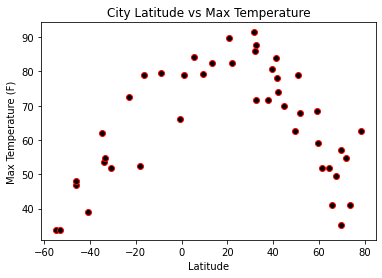

In [11]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]

plt.scatter(x_axis, y_axis, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.savefig("Instructions/output_data/Fig1.png")

## Latitude vs. Humidity Plot

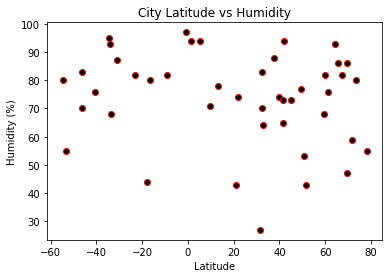

In [12]:
x_axis1 = weather_df["Lat"]
y_axis1 = weather_df["Humidity"]

plt.scatter(x_axis1, y_axis1, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.savefig("Instructions/output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

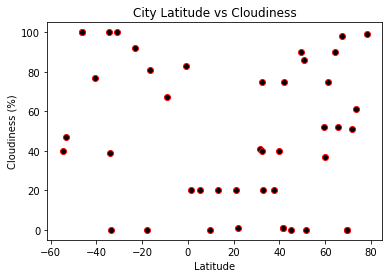

In [13]:
x_axis2=weather_df["Lat"]
y_axis2=weather_df["Cloudiness"]

plt.scatter(x_axis2, y_axis2, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.savefig("Instructions/output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

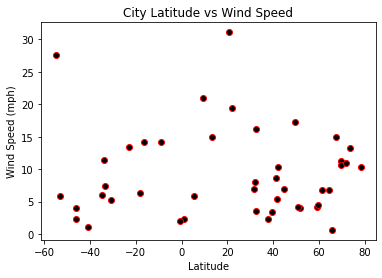

In [14]:
x_axis3=weather_df["Lat"]
y_axis3=weather_df["Wind Speed"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.savefig("Instructions/output_data/Fig4.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


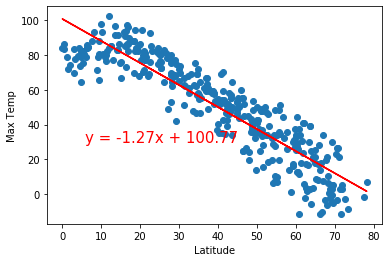

In [15]:
northern = weather_df.loc[weather_df["Lat"]>0]
northern

southern = weather_df.loc[weather_df["Lat"]<0]
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ushuaia,-54.80,-68.30,33.80,80,40,27.51,AR,1595900312
7,Punta Arenas,-53.15,-70.92,33.80,55,47,5.82,CL,1595900100
9,Puerto Ayora,-0.74,-90.35,66.00,97,83,1.99,EC,1595900313
12,Esperance,-33.87,121.90,53.60,93,39,11.41,AU,1595900313
13,Port Alfred,-33.59,26.89,54.77,68,0,7.43,ZA,1595900313
14,Faanui,-16.48,-151.75,79.07,80,81,14.16,PF,1595900313
18,Rivera,-30.91,-55.55,51.84,87,100,5.28,UY,1595900314
24,Kiama,-34.68,150.87,62.01,95,100,5.99,AU,1595900314
29,Opuwo,-18.06,13.84,52.47,44,0,6.31,NA,1595900315
33,Mataura,-46.19,168.86,46.99,83,100,2.26,NZ,1595900315


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


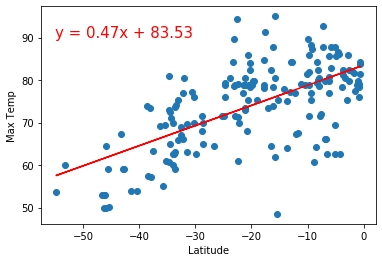

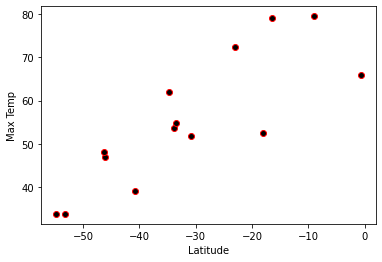

In [16]:
x_axis4=southern["Lat"]
y_axis4=southern["Max Temp"]

plt.scatter(x_axis4, y_axis4, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Instructions/output_data/Fig5.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


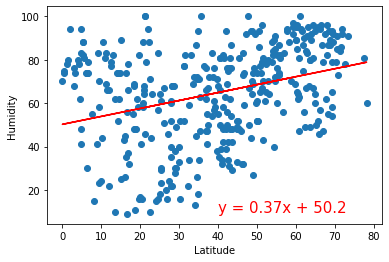

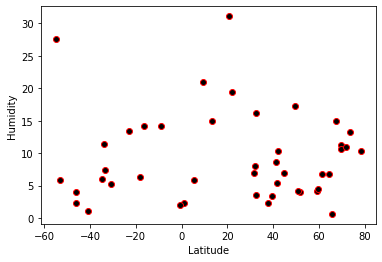

In [17]:
x_axis5=northern["Lat"]
y_axis5=northern["Humidity"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Instructions/output_data/Fig6.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


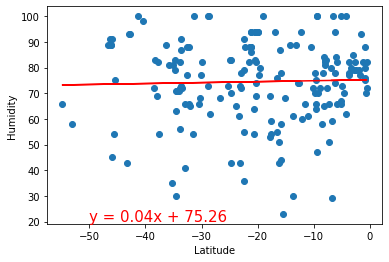

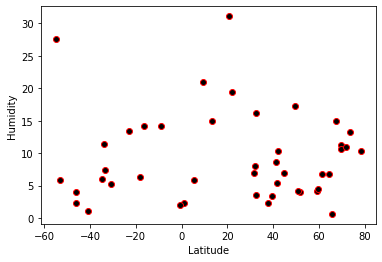

In [18]:
x_axis6=southern["Lat"]
y_axis6=southern["Humidity"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Instructions/output_data/Fig7.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


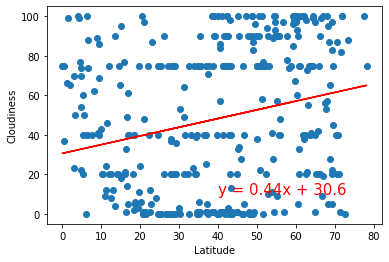

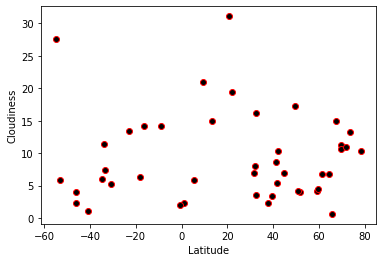

In [19]:
x_axis7=northern["Lat"]
y_axis7=northern["Cloudiness"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Instructions/output_data/Fig8.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


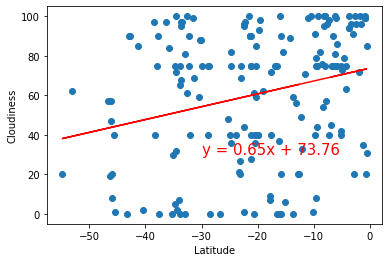

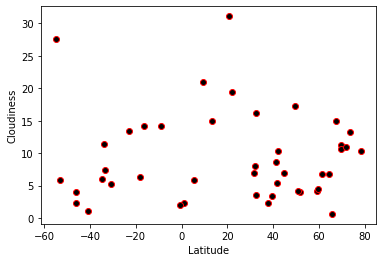

In [20]:
x_axis8=southern["Lat"]
y_axis8=southern["Cloudiness"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Instructions/output_data/Fig9.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


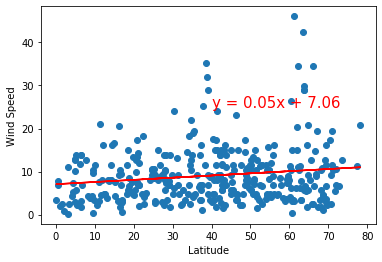

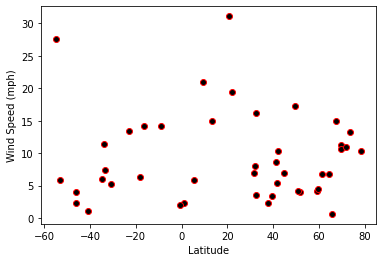

In [21]:
x_axis9=northern["Lat"]
y_axis9=northern["Wind Speed"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Instructions/output_data/Fig10.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


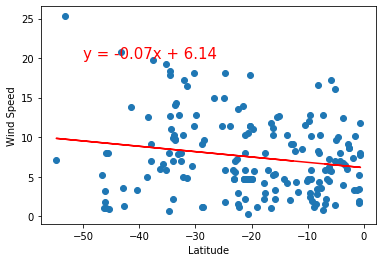

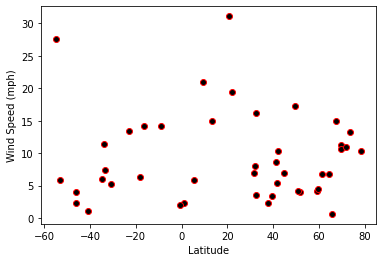

In [22]:
x_axis10=southern["Lat"]
y_axis10=southern["Wind Speed"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Instructions/output_data/Fig11.png")
